<a href="https://colab.research.google.com/github/sathishchamps/ML-Projects/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [10]:
# getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
# checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [29]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())


1    2153
0    2123
2      40
3      23
4       1
Name: fuel, dtype: int64
0    3244
1     994
2     102
Name: seller_type, dtype: int64
0    3892
1     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding the Categorical Data

In [33]:
# encoding "fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

# encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "owner"column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [34]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


Splitting the data and Target

In [35]:
x=car_dataset.drop(['name','selling_price'],axis=1)
y=car_dataset['selling_price']

In [36]:
print(x)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Traning and Test data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

Model Training

    1. Linear Regression



In [41]:
# loading the linear regression model
lin_reg_model = LinearRegression()


In [42]:
lin_reg_model.fit(x_train,y_train)


LinearRegression()

Model Evaluation

In [43]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [45]:
# R squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R squred Error:',error_score)

R squred Error: 0.4325630227506242


Visualize the actual prices and Prediction price

Text(0.5, 1.0, 'Actual Prices vs Presicted Prices')

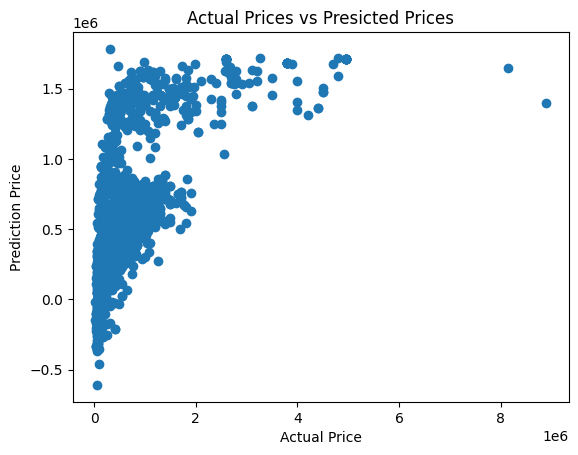

In [47]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title("Actual Prices vs Presicted Prices")

In [48]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(x_test)

In [50]:
# R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred Error:',error_score)

R squred Error: 0.5123159688209236


Text(0.5, 1.0, 'Actual Prices vs Presicted Prices')

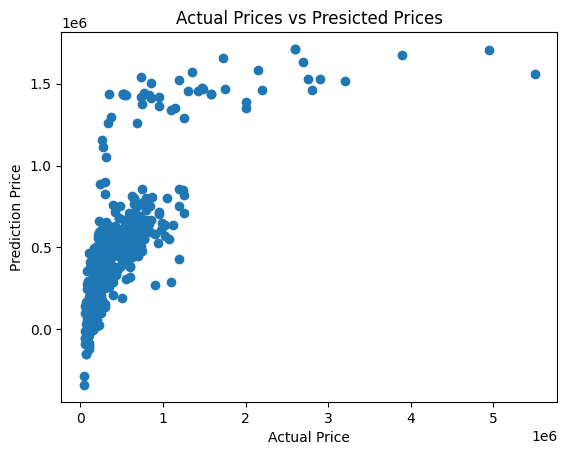

In [52]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title("Actual Prices vs Presicted Prices")


2.Lasso Regression

In [53]:
# loading the Lasso regression model
las_reg_model = Lasso()

In [54]:
las_reg_model.fit(x_train,y_train)


Lasso()

In [56]:
# prediction on Training data
training_data_prediction = las_reg_model.predict(x_train)

In [58]:
# R squared Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R squred Error:',error_score)

R squred Error: 0.4325630226975421


Text(0.5, 1.0, 'Actual Prices vs Presicted Prices')

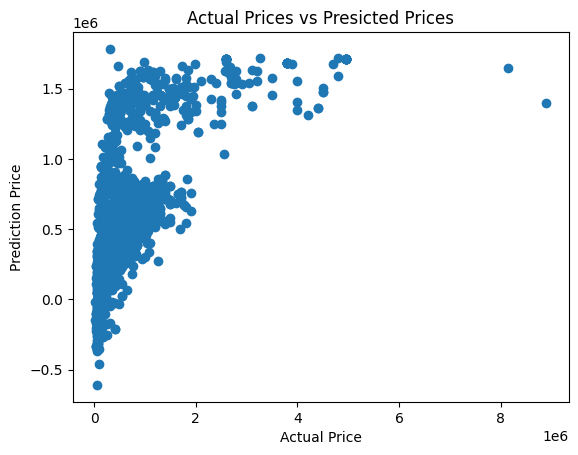

In [60]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title("Actual Prices vs Presicted Prices")

In [62]:
# prediction on Test data
test_data_prediction = las_reg_model.predict(x_test)

In [63]:
# R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred Error:',error_score)

R squred Error: 0.512315270570079


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

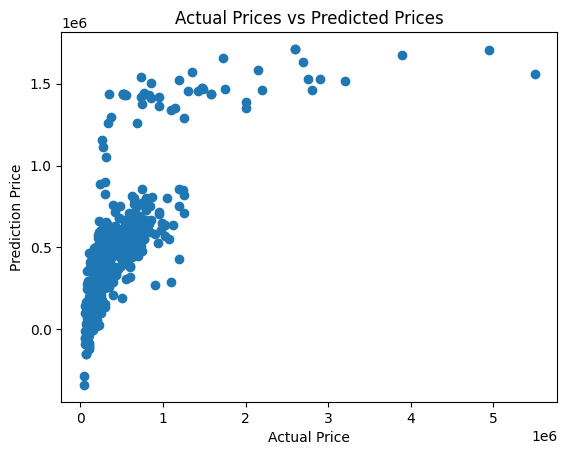

In [66]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Price')
plt.title("Actual Prices vs Predicted Prices")
